# Post-Rebalancing Stock Returns Analysis

This section studies the impact of index rebalancing on the returns on the affected stocks.<br>
<br>
In this study, we focus on the following period:
- Ex-ante days: {1, 3, 5} days prior to the index rebalancing (ex-date)
- Ex-post days: {3, 5, 10, 20} days after the ex-date.

Our sample consists of observations from Jun 2022 - Jun 2023, encompassing stocks that are included/ excluded from the FTSE100 and FTSE250 index universe. There should be in total 65 instances of inclusions and exclusions in the FTSE large-mid cap universe over the 1 year period.

In [1]:
# Import important libraries

# Basic computation packages
import numpy as np
import pandas as pd

# Plot packages
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical package
from scipy import stats

# Format precision
np.set_printoptions(precision = 3)

# Import and Wrangle data

In [2]:
# Import data
df = pd.read_csv('../output/ETL_ftse_price_data_10y.csv')
df.head()

,Name,ISIN,post_date,pre_twenty_pd,pre_five_pd,pre_three_pd,pre_one_pd,post_three_pd,post_five_pd,post_ten_pd,post_twenty_pd,Post Date,FTSE100,FTSE250
0,ASOS,GB0030927254,2023-06-19,4.460999,3.292998,3.279998,3.703999,4.087000,3.927998,3.758999,3.518999,2023-06-19,NaN,-1.0
1,BRITISH LAND,GB0001367019,2023-06-19,3.562000,3.438999,3.347000,3.430000,3.083999,2.975000,3.132998,3.188999,2023-06-19,-1.0,1.0
2,CAPITA,GB00B23K0M20,2023-06-19,0.321000,0.329600,0.324400,0.320000,0.292000,0.279200,0.275000,0.278200,2023-06-19,NaN,1.0
3,CAPRICORN ENERGY,GB00BQ98V038,2023-06-19,1.950000,1.934000,1.920000,1.814000,1.818000,1.828000,1.878000,1.922000,2023-06-19,NaN,-1.0
4,EMPIRIC STUDENT PROPERTY,GB00BLWDVR75,2023-06-19,0.916000,0.884000,0.869000,0.919000,0.860000,0.850000,0.840000,0.875000,2023-06-19,NaN,1.0


In [3]:
print(f'There are a total of {df.shape[0]} instances in our investigation period that are impacted by index rebalancing in FTSE100 and FTSE250 indices.')

There are a total of 499 instances in our investigation period that are impacted by index rebalancing in FTSE100 and FTSE250 indices.


In [4]:
df['Group'] =\
    list(
        zip(df['FTSE100'], 
            df['FTSE250']
        )
    )

groups = df['Group'].unique()

groups

array([(nan, -1.0), (-1.0, 1.0), (nan, 1.0), (1.0, -1.0), (-1.0, nan),
       (1.0, nan)], dtype=object)

In [5]:
df['Group'] =\
    df['Group']\
    .map({
            groups[0] : 'drop_FTSE250', # exited FTSE250 into smallcap
            groups[1] : 'FTSE100_FTSE250', # exited FTSE100 into FTSE250
            groups[2] : 'new_FTSE250', # entered FTSE250 (either new or from smallcap)
            groups[3] : 'FTSE250_FTSE100', # entered FTSE100 from FTSE250
            groups[4] : 'drop_FTSE100', # exited FTSE100 into smallcap or nowhere
            groups[5] : 'new_FTSE100' # entered FTSE100 (either new or from smallcap)
        })

df.head()

,Name,ISIN,post_date,pre_twenty_pd,pre_five_pd,pre_three_pd,pre_one_pd,post_three_pd,post_five_pd,post_ten_pd,post_twenty_pd,Post Date,FTSE100,FTSE250,Group
0,ASOS,GB0030927254,2023-06-19,4.460999,3.292998,3.279998,3.703999,4.087000,3.927998,3.758999,3.518999,2023-06-19,NaN,-1.0,drop_FTSE250
1,BRITISH LAND,GB0001367019,2023-06-19,3.562000,3.438999,3.347000,3.430000,3.083999,2.975000,3.132998,3.188999,2023-06-19,-1.0,1.0,FTSE100_FTSE250
2,CAPITA,GB00B23K0M20,2023-06-19,0.321000,0.329600,0.324400,0.320000,0.292000,0.279200,0.275000,0.278200,2023-06-19,NaN,1.0,new_FTSE250
3,CAPRICORN ENERGY,GB00BQ98V038,2023-06-19,1.950000,1.934000,1.920000,1.814000,1.818000,1.828000,1.878000,1.922000,2023-06-19,NaN,-1.0,drop_FTSE250
4,EMPIRIC STUDENT PROPERTY,GB00BLWDVR75,2023-06-19,0.916000,0.884000,0.869000,0.919000,0.860000,0.850000,0.840000,0.875000,2023-06-19,NaN,1.0,new_FTSE250


In [6]:
df.groupby('Group').count()

,Name,ISIN,post_date,pre_twenty_pd,pre_five_pd,pre_three_pd,pre_one_pd,post_three_pd,post_five_pd,post_ten_pd,post_twenty_pd,Post Date,FTSE100,FTSE250
Group,,,,,,,,,,,,,,
FTSE100_FTSE250,62,62,62,62,62,62,62,62,62,62,62,62,62,62
FTSE250_FTSE100,64,64,64,64,64,64,64,64,64,64,64,64,64,64
drop_FTSE100,4,4,4,4,4,4,4,4,4,4,4,4,4,0
drop_FTSE250,178,178,178,178,178,178,178,178,178,178,178,178,0,178
new_FTSE100,7,7,7,7,7,7,7,7,7,7,7,7,7,0
new_FTSE250,184,184,184,184,184,184,184,184,184,184,184,184,0,184


From the above, we see that both 'new_FTSE100' (stocks that entered FTSE100 out of nowhere) and 'drop_FTSE100' (stocks that exited FTSE100 into nowhere) are rare events.<br>
We may want to exclude these two from our analysis, given that only 11 instances occured over the past 10 years.

In [7]:
# Remove redundant columns
df =\
    df\
    .drop(
        [
            'ISIN',
            'FTSE100',
            'FTSE250'
        ],
    axis = 1)

# Remove rare cases
df =\
    df[
        ~(df['Group']
          .isin(['new_FTSE100', 'drop_FTSE100']))
    ].reset_index(drop = True)

## Calculate required returns for analysis


In [8]:
df

,Name,post_date,pre_twenty_pd,pre_five_pd,pre_three_pd,pre_one_pd,post_three_pd,post_five_pd,post_ten_pd,post_twenty_pd,Post Date,Group
0,ASOS,2023-06-19,4.460999,3.292998,3.279998,3.703999,4.087000,3.927998,3.758999,3.518999,2023-06-19,drop_FTSE250
1,BRITISH LAND,2023-06-19,3.562000,3.438999,3.347000,3.430000,3.083999,2.975000,3.132998,3.188999,2023-06-19,FTSE100_FTSE250
2,CAPITA,2023-06-19,0.321000,0.329600,0.324400,0.320000,0.292000,0.279200,0.275000,0.278200,2023-06-19,new_FTSE250
3,CAPRICORN ENERGY,2023-06-19,1.950000,1.934000,1.920000,1.814000,1.818000,1.828000,1.878000,1.922000,2023-06-19,drop_FTSE250
4,EMPIRIC STUDENT PROPERTY,2023-06-19,0.916000,0.884000,0.869000,0.919000,0.860000,0.850000,0.840000,0.875000,2023-06-19,new_FTSE250
...,...,...,...,...,...,...,...,...,...,...,...,...
483,LONDON STOCK EX.GROUP,2013-03-18,13.000000,13.919998,14.000000,13.849998,13.339998,12.919998,13.029998,12.819998,2013-03-18,FTSE250_FTSE100
484,NMC HEALTH,2013-03-18,2.546249,3.099998,3.192498,3.489998,3.378999,3.399998,3.125000,3.259998,2013-03-18,new_FTSE250
485,RAVEN PROPERTY GROUP LIMITED,2013-03-18,0.657000,0.749500,0.720000,0.720000,0.720000,0.712500,0.717500,0.745000,2013-03-18,drop_FTSE250
486,ESKEN LIMITED 10P,2013-03-18,0.938000,0.847000,0.835000,0.857000,0.802500,0.790000,0.827500,0.750000,2013-03-18,drop_FTSE250


In [9]:
# set up required lists for iteration
days_bef_ex_ante = ['twenty', 'five', 'three', 'one'] # before event
days_aft_ex_post = ['three', 'five', 'ten', 'twenty'] # after event

for pre_day in days_bef_ex_ante:
    for post_day in days_aft_ex_post:
        # Calculate ex-ante-ex-post return
        df[f'ret_{pre_day}_{post_day}'] =\
        (
            (df[f'post_{post_day}_pd']
             /df[f'pre_{pre_day}_pd']) - 1
        )

In [10]:
# Extract returns as a standalone df
df_rets =\
    df.drop(
        df.columns[1:11],
        axis = 1
    ).copy()

In [11]:
df_rets.head()

,Name,Group,ret_twenty_three,ret_twenty_five,ret_twenty_ten,ret_twenty_twenty,ret_five_three,ret_five_five,ret_five_ten,ret_five_twenty,ret_three_three,ret_three_five,ret_three_ten,ret_three_twenty,ret_one_three,ret_one_five,ret_one_ten,ret_one_twenty
0,ASOS,drop_FTSE250,-0.083838,-0.119480,-0.157364,-0.211163,0.241118,0.192833,0.141513,0.068631,0.246037,0.197561,0.146037,0.072866,0.103402,0.060475,0.014849,-0.049946
1,BRITISH LAND,FTSE100_FTSE250,-0.134194,-0.164795,-0.120438,-0.104717,-0.103228,-0.134923,-0.088980,-0.072696,-0.078578,-0.111144,-0.063938,-0.047207,-0.100875,-0.132653,-0.086589,-0.070263
2,CAPITA,new_FTSE250,-0.090343,-0.130218,-0.143302,-0.133333,-0.114078,-0.152912,-0.165656,-0.155947,-0.099876,-0.139334,-0.152281,-0.142417,-0.087500,-0.127500,-0.140625,-0.130625
3,CAPRICORN ENERGY,drop_FTSE250,-0.067692,-0.062564,-0.036923,-0.014359,-0.059979,-0.054809,-0.028955,-0.006205,-0.053125,-0.047917,-0.021875,0.001042,0.002205,0.007718,0.035281,0.059537
4,EMPIRIC STUDENT PROPERTY,new_FTSE250,-0.061135,-0.072052,-0.082970,-0.044760,-0.027149,-0.038461,-0.049774,-0.010181,-0.010357,-0.021864,-0.033372,0.006905,-0.064200,-0.075082,-0.085963,-0.047878


# Exploratory Data Analysis

## Summary Statistics - Overall

We shall run a summary on the returns of the entire sample of 65 instances. 

In [12]:
df_rets.describe()

,ret_twenty_three,ret_twenty_five,ret_twenty_ten,ret_twenty_twenty,ret_five_three,ret_five_five,ret_five_ten,ret_five_twenty,ret_three_three,ret_three_five,ret_three_ten,ret_three_twenty,ret_one_three,ret_one_five,ret_one_ten,ret_one_twenty
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,-0.025822,-0.030298,-0.025889,-0.015817,0.000095,-0.006409,0.000504,0.012477,0.003611,-0.003275,0.004432,0.016801,0.004206,-0.002148,0.004842,0.017251
std,0.148630,0.154324,0.156522,0.171373,0.100008,0.097105,0.130508,0.159076,0.108267,0.098725,0.148014,0.176534,0.085605,0.082296,0.117761,0.155032
min,-0.671610,-0.705452,-0.760336,-0.780707,-0.497761,-0.482089,-0.444029,-0.536095,-0.415493,-0.320175,-0.412839,-0.529600,-0.422006,-0.331918,-0.392475,-0.499042
25%,-0.068882,-0.072935,-0.095478,-0.094175,-0.044184,-0.045567,-0.050806,-0.059991,-0.040038,-0.044080,-0.049974,-0.056379,-0.028503,-0.034531,-0.046444,-0.050991
50%,-0.012706,-0.015115,-0.004446,0.001072,-0.001291,-0.004222,-0.001279,0.006916,-0.005536,-0.003982,-0.002236,0.007075,-0.002985,-0.000875,0.001879,0.006838
75%,0.046250,0.048136,0.054490,0.073590,0.034738,0.037551,0.047566,0.064263,0.030225,0.032375,0.047036,0.062177,0.029039,0.030751,0.045271,0.068516
max,0.690988,0.579186,0.429864,0.638484,0.768248,0.453725,1.634973,1.381491,1.043478,0.679999,2.195070,1.752173,0.993214,0.638676,1.472820,1.684478


## Summary Statistics - by different ex-ante/ex-post combination

We may also want to run a more granular summary stats based on the different index movement, i.e.
- Exclusion from FTSE100 -> Inclusion into FTSE250 `FTSE100_FTSE250`
- Exclusion from FTSE250 -> Inclusion into FTSE100 `FTSE250_FTSE100`
- Exclusion from FTSE250 `drop_FTSE250`
- Inclusion into FTSE250 `new_FTSE250`

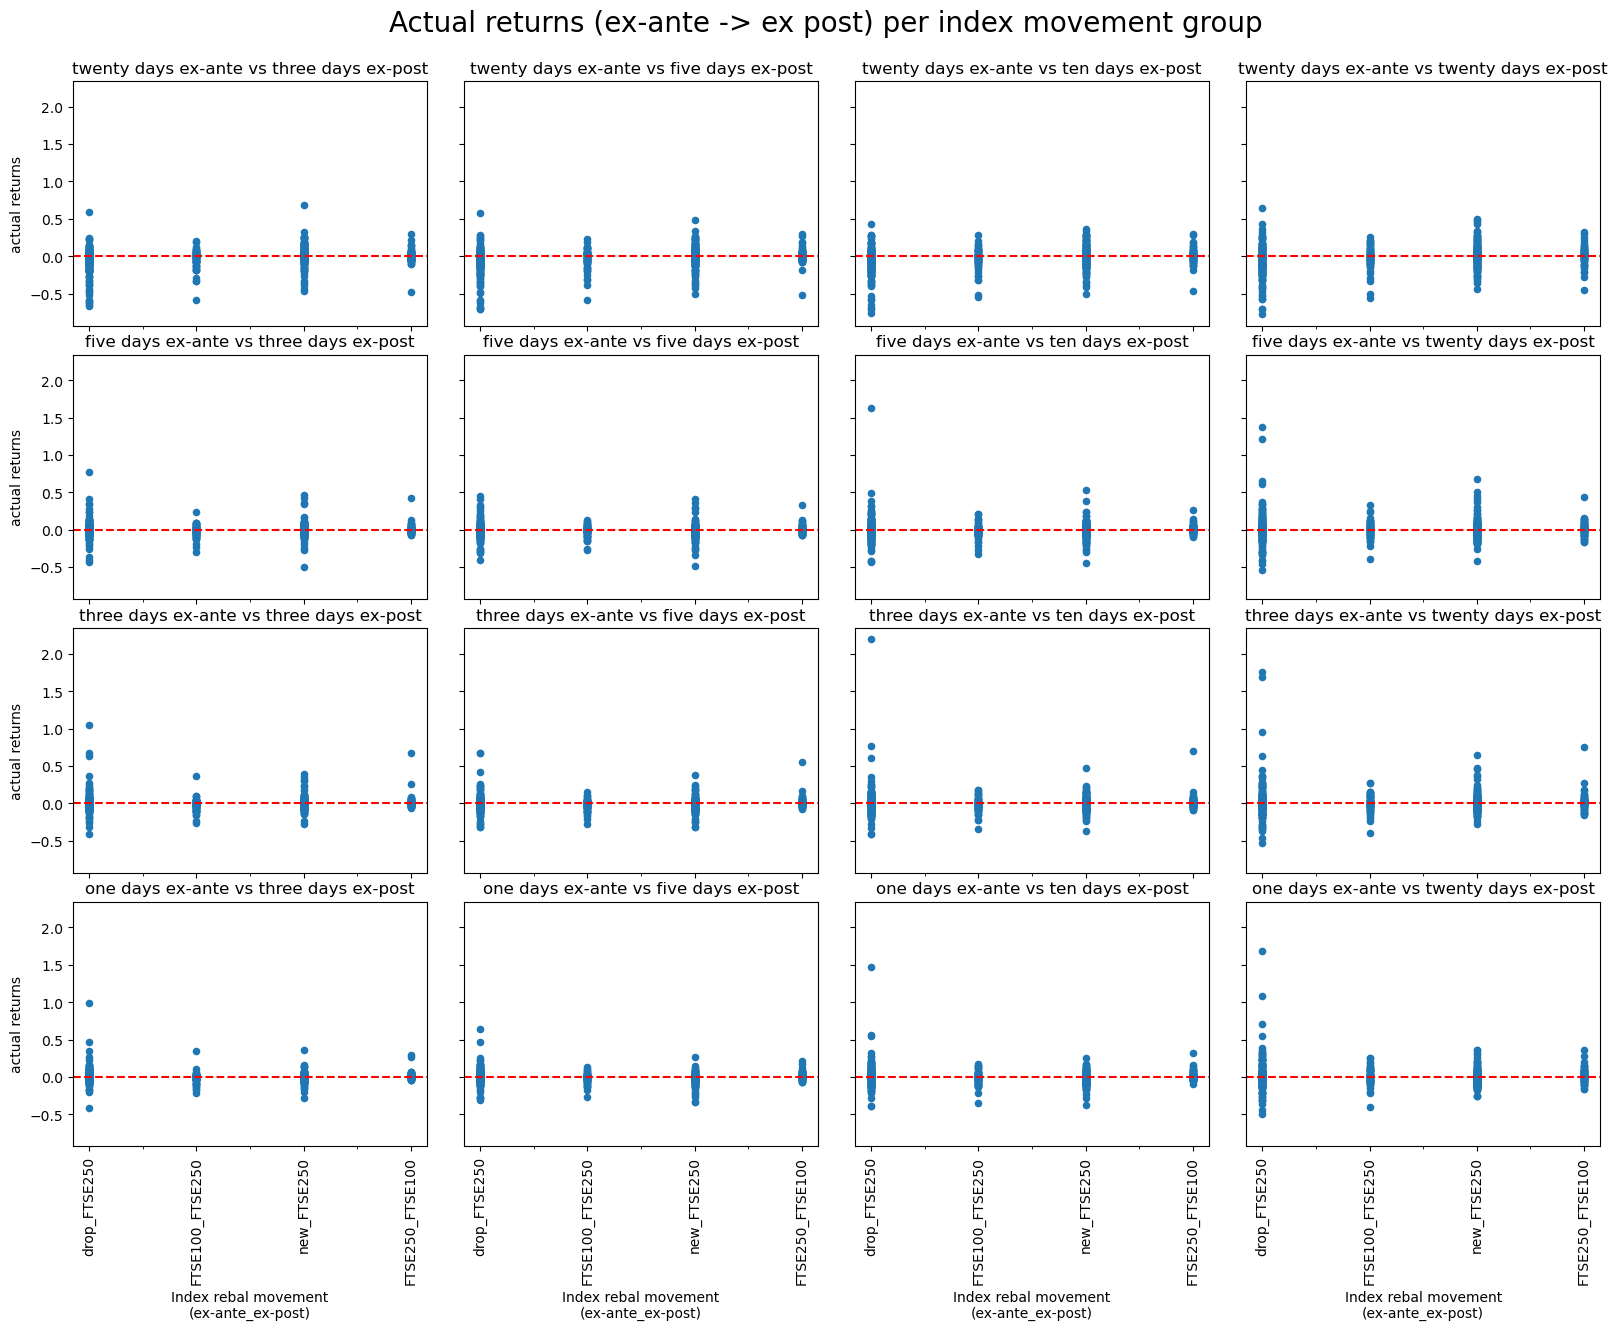

In [13]:
fig, axs =\
    plt.subplots(4, 4, 
                 figsize = (16,12),
                sharex = True,
                sharey = True)

fig.suptitle('Actual returns (ex-ante -> ex post) per index movement group\n', fontsize = 20)
fig.tight_layout()

for i, pre_day in enumerate(days_bef_ex_ante):
    for j, post_day in enumerate(days_aft_ex_post):
        df_rets.plot.scatter(
            x = 'Group',
            y = f'ret_{pre_day}_{post_day}',
            ax = axs[i,j])
        
        axs[i, j].axhline(c = 'r', ls = '--')
        
        axs[i, j].set_ylabel(f'actual returns')
        
        axs[i, j].set_xlabel('Index rebal movement\n(ex-ante_ex-post)')
        axs[i,j].tick_params('x', labelrotation=90)
        axs[i,j].set_title(f'{pre_day} days ex-ante vs {post_day} days ex-post')

plt.show()

In [14]:
summary_rets =\
    df_rets\
        .groupby(
            by = 'Group'
        ).describe()\
        .T

In [15]:
# Print only the number of samples per index movement group
summary_rets.xs('count', level=1, drop_level=False).head(1)

,Group,FTSE100_FTSE250,FTSE250_FTSE100,drop_FTSE250,new_FTSE250
ret_twenty_three,count,62.0,64.0,178.0,184.0


# Hypothesis Tests

Now that we have done the exploratary data analysis, we shall apply hypothesis tests on to ascertain our hypothesis.<br>

Recall: Our hypothesis is that there is non-zero mean return on stocks that are impacted by the index rebalancing. We are unsure at this point the direction of this impact, as it is highly dependent on the ETF flows and AUM, which warrants further fundamental analyses. We want to test that our conjecture is in the right direction.<br>

Given that our sample size per group is less than 30, we shall run a one-sample t-test, with the following setup:
- `H0`: null hypothesis; mean return is zero
- `H1`: alternative hypothesis; mean return is non-zero

Here, we are running a two-tailed test, with a significance level of 5%.

## Analysing the Index Rebalancing Arbitrage in the entire 10 years window

In [16]:
t_test_res = []
for series in df_rets.columns[2:]:
    returns = np.array(df_rets[series])
    t_statistic, p_value = stats.ttest_1samp(returns, 0)
    
    t_test_res.append({
        'series': series,
        't-stats' : t_statistic,
        'p-value' : p_value,
        'conclusion' : 'reject Null' if p_value < 0.05 else 'do not reject Null'
    })
    
pd.DataFrame(t_test_res)

,series,t-stats,p-value,conclusion
0,ret_twenty_three,-3.837925,0.000140,reject Null
1,ret_twenty_five,-4.336978,0.000018,reject Null
2,ret_twenty_ten,-3.653813,0.000286,reject Null
3,ret_twenty_twenty,-2.038938,0.041996,reject Null
4,ret_five_three,0.020928,0.983311,do not reject Null
5,ret_five_five,-1.458051,0.145471,do not reject Null
6,ret_five_ten,0.085285,0.932070,do not reject Null
7,ret_five_twenty,1.732672,0.083787,do not reject Null
8,ret_three_three,0.736693,0.461664,do not reject Null
9,ret_three_five,-0.732727,0.464077,do not reject Null


In [17]:
def run_grannular_t_test(df_rets):
    t_test_granular_res = []
    
    for series in df_rets.columns[2:]:
        for group in df_rets['Group'].unique():
            returns = np\
                        .array(df_rets
                            .loc[df_rets['Group'] == group,
                                    series])
            mean_ret = returns.mean()
            t_statistic, p_value = stats.ttest_1samp(returns, 0)

            t_test_granular_res.append({
                'series': series,
                'group': group,
                'mean': mean_ret,
                't-stats' : t_statistic,
                'p-value' : p_value,
                'conclusion' : 'reject Null' if p_value < 0.05 else 'do not reject Null'
            })
        
    df_t_test_granular = pd.DataFrame(t_test_granular_res)
    return df_t_test_granular

In [18]:
df_t_test_granular_overall = run_grannular_t_test(df_rets)

In [19]:
order = []

for pre_day in days_bef_ex_ante:
    for post_day in days_aft_ex_post:
        order.append(f'ret_{pre_day}_{post_day}')


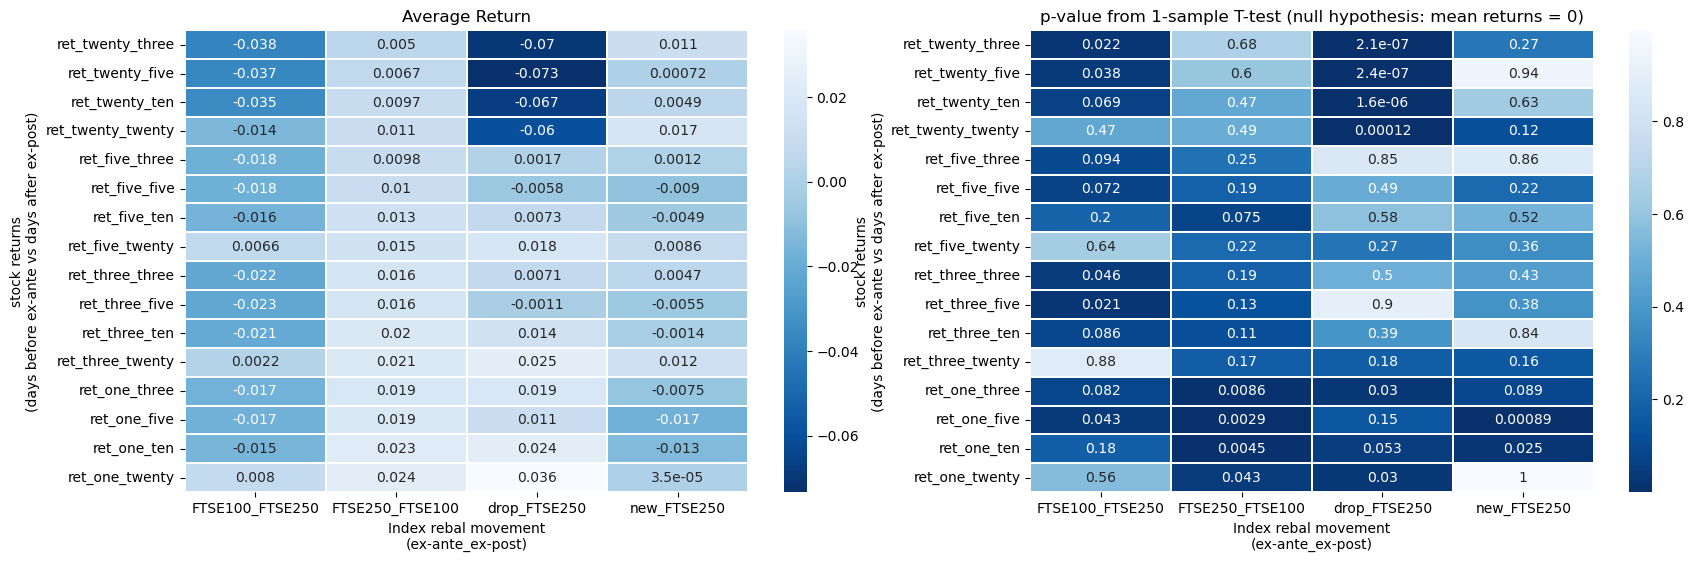

In [20]:
# mean
df_mean_pivot = df_t_test_granular_overall.pivot(index='series', columns='group', values='mean')
df_mean_pivot = df_mean_pivot.loc[order]

# p-values
df_t_test_pivot = df_t_test_granular_overall.pivot(index='series', columns='group', values='p-value')
df_t_test_pivot = df_t_test_pivot.loc[order]


fig, axs = plt.subplots(1, 2, figsize = (20,6))
sns.heatmap(df_mean_pivot, cmap = 'Blues_r',  linewidths = 0.30, annot = True, ax = axs[0])
axs[0].set_title('Average Return')
axs[0].set_xlabel('Index rebal movement\n(ex-ante_ex-post)')
axs[0].set_ylabel('stock returns\n(days before ex-ante vs days after ex-post)')

sns.heatmap(df_t_test_pivot, cmap = 'Blues_r',  linewidths = 0.30, annot = True, ax = axs[1])
axs[1].set_title('p-value from 1-sample T-test (null hypothesis: mean returns = 0)')
axs[1].set_xlabel('Index rebal movement\n(ex-ante_ex-post)')
axs[1].set_ylabel('stock returns\n(days before ex-ante vs days after ex-post)')

plt.show()

From the heatmap, we see that there are instances in which there are statistically non-zero mean returns.

### Dropping out from FTSE100 into FTSE250
Generally, we observed negative returns across the different test periods.<br>
There are statistically significant negative returns comparing 20 trading days prior to rebalancing and three to five days ex-post, with a significance level of 5%.<br>
This is within expectation as dropping from FTSE100 appears to be a bad news for investors. Our assumption is that investors are risk-averse, and react very sensitively towards any perceived bad news.<br>
20 trading days prior to rebalancing is around one week prior to the rank day for FTSE UK index series, meaning to say that investors are already actively sell-off their holdings for stocks that are anticipated to drop off from the index. Therefore, there is a potential opportunity and profit to earn by selling off stocks we are confident of being dropped off from the index before the rank day itself.

### Entering FTSE100 from FTSE250
We only observed statistically significant positve returns when comparing one day prior to rebalancing day to days up to 20 days after the rebalancing. This is an interesting phenomenon, as it appears that investors, while very swift to act on bad news, hesitated to act on good news. Most only acted one day before the rebalancing day, resulting in a strong buy pressure that lifts the stock prices up. This can also be explained by investors' risk aversion, whereby investors are willing to act on certainty and not take chances that the stock price would increase prematurely. The drift phenomenon, as observed with positive return even after 20 days, signifies investors' delayed reactions.

### Exiting FTSE250
The negative returns on stocks that dropped off from FTSE250 has even stronger statistical significance compared to dropping off from FTSE100. This is due to 2 potential reasons:
1. FTSE 250 is a larger universe by number of constituents and signifies midcap companies. The perception of dropping from midcap into smallcap is a lot more negative than dropping off from FTSE 100, as small cap companies are perceived to be less established and risky assets by nature. Thus, risk-averse investors would act much strongly, and much earlier, to sell off their holdings of stocks that are likely to drop off from the FTSE 250 universe
2. FTSE 100 and FTSE 250 have established ETFs that track the indices, and their AUMs are closely matched. When stocks dropped off from FTSE 100 into FTSE 250, there are both buying and selling pressure, as ETFs need to secure the stocks required to track the indices. However, the AUM on FTSE small cap is much smaller. Thus the selling pressure would outweigh the buying pressure significantly
This shows that there is opportunities and profits to earn by selling off stocks we are confident of being dropped off from the index before the rank day itself.

### Entering FTSE250
Similar to stocks entering 100, we see statistically significant non-zero returns for stocks entering the FTSE250 index. However, these stocks raked in negative returns instead of positive. This may seem counterintuitive at first. The likely reason why there are negative returns on stocks entering FTSE250 index despite the good news is that it is likely due to speculators cashing out on these smaller cap stocks.<br>

As we explained, risk-averse investors tend to act fast on bad news but slow on good news. Therefore, such investors only started to sell-off their stock holdings to realized their positive profit upon the good news when there is close to 100% certainty of being included in the FTSE 250 index. One interesting to also note is that this sell-off happens also very quickly, and the price reverts back to the closing price on average on the rebalancing day with 100% certainty.

This analysis shows that there is a strategy which we can short stocks that enters FTSE250 one week in advance of the rank day, and still reap positive profits.

## Analysing the Index Rebalancing Arbitrage across time (2013 - 2023)

This analysis shall explore if there is alpha decay in this strategy, and if recent observations show that the strategy is still relevant in recent years.

In [21]:
def plot_mean_pvalue_charts(df, title = None):
    # mean
    df_mean_pivot = df.pivot(index='series', columns='group', values='mean')
    df_mean_pivot = df_mean_pivot.loc[order]

    # p-values
    df_t_test_pivot = df.pivot(index='series', columns='group', values='p-value')
    df_t_test_pivot = df_t_test_pivot.loc[order]


    fig, axs = plt.subplots(1, 2, figsize = (20,6))
    if title:
        fig.suptitle(title)
        
    sns.heatmap(df_mean_pivot, cmap = 'Blues_r',  linewidths = 0.30, annot = True, ax = axs[0])
    axs[0].set_title('Average Return')
    axs[0].set_xlabel('Index rebal movement\n(ex-ante_ex-post)')
    axs[0].set_ylabel('stock returns\n(days before ex-ante vs days after ex-post)')

    sns.heatmap(df_t_test_pivot, cmap = 'Blues_r',  linewidths = 0.30, annot = True, ax = axs[1])
    axs[1].set_title('p-value from 1-sample T-test (null hypothesis: mean returns = 0)')
    axs[1].set_xlabel('Index rebal movement\n(ex-ante_ex-post)')
    axs[1].set_ylabel('stock returns\n(days before ex-ante vs days after ex-post)')

    plt.show()

In [22]:
# Extract returns as a standalone df
df_rets_by_year =\
    df.drop(
        df.columns[1:10],
        axis = 1
    ).copy()

df_rets_by_year['Post Date'] = pd.to_datetime(df_rets_by_year['Post Date'])
df_rets_by_year['year'] = df_rets_by_year['Post Date'].dt.year
df_rets_by_year['quarter'] = df_rets_by_year['Post Date'].dt.quarter

df_rets_by_year.head()

,Name,Post Date,Group,ret_twenty_three,ret_twenty_five,ret_twenty_ten,ret_twenty_twenty,ret_five_three,ret_five_five,ret_five_ten,...,ret_three_three,ret_three_five,ret_three_ten,ret_three_twenty,ret_one_three,ret_one_five,ret_one_ten,ret_one_twenty,year,quarter
0,ASOS,2023-06-19,drop_FTSE250,-0.083838,-0.119480,-0.157364,-0.211163,0.241118,0.192833,0.141513,...,0.246037,0.197561,0.146037,0.072866,0.103402,0.060475,0.014849,-0.049946,2023,2
1,BRITISH LAND,2023-06-19,FTSE100_FTSE250,-0.134194,-0.164795,-0.120438,-0.104717,-0.103228,-0.134923,-0.088980,...,-0.078578,-0.111144,-0.063938,-0.047207,-0.100875,-0.132653,-0.086589,-0.070263,2023,2
2,CAPITA,2023-06-19,new_FTSE250,-0.090343,-0.130218,-0.143302,-0.133333,-0.114078,-0.152912,-0.165656,...,-0.099876,-0.139334,-0.152281,-0.142417,-0.087500,-0.127500,-0.140625,-0.130625,2023,2
3,CAPRICORN ENERGY,2023-06-19,drop_FTSE250,-0.067692,-0.062564,-0.036923,-0.014359,-0.059979,-0.054809,-0.028955,...,-0.053125,-0.047917,-0.021875,0.001042,0.002205,0.007718,0.035281,0.059537,2023,2
4,EMPIRIC STUDENT PROPERTY,2023-06-19,new_FTSE250,-0.061135,-0.072052,-0.082970,-0.044760,-0.027149,-0.038461,-0.049774,...,-0.010357,-0.021864,-0.033372,0.006905,-0.064200,-0.075082,-0.085963,-0.047878,2023,2


Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 1                1             7            7


c:\Users\leeca\anaconda3\envs\quantco\lib\site-packages\scipy\stats\_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\leeca\anaconda3\envs\quantco\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\leeca\anaconda3\envs\quantco\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


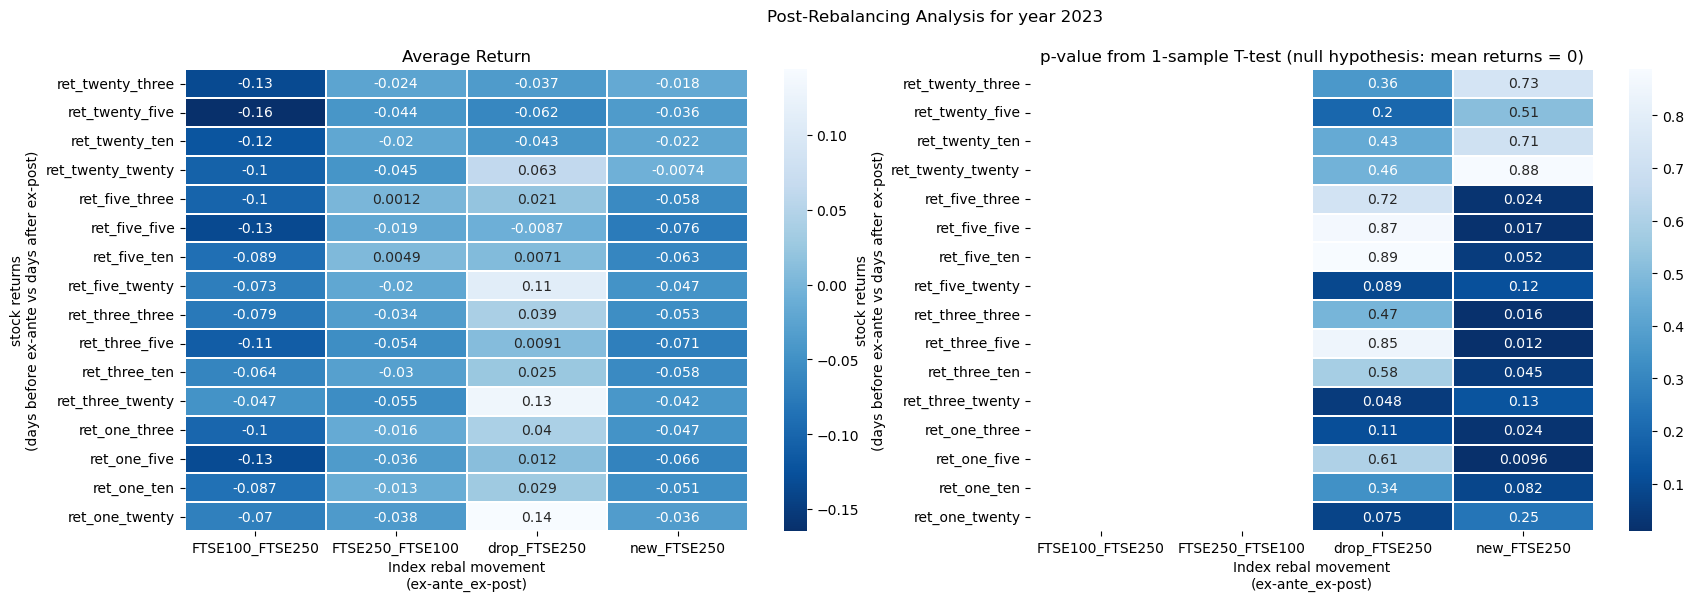

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 5                6            10           12


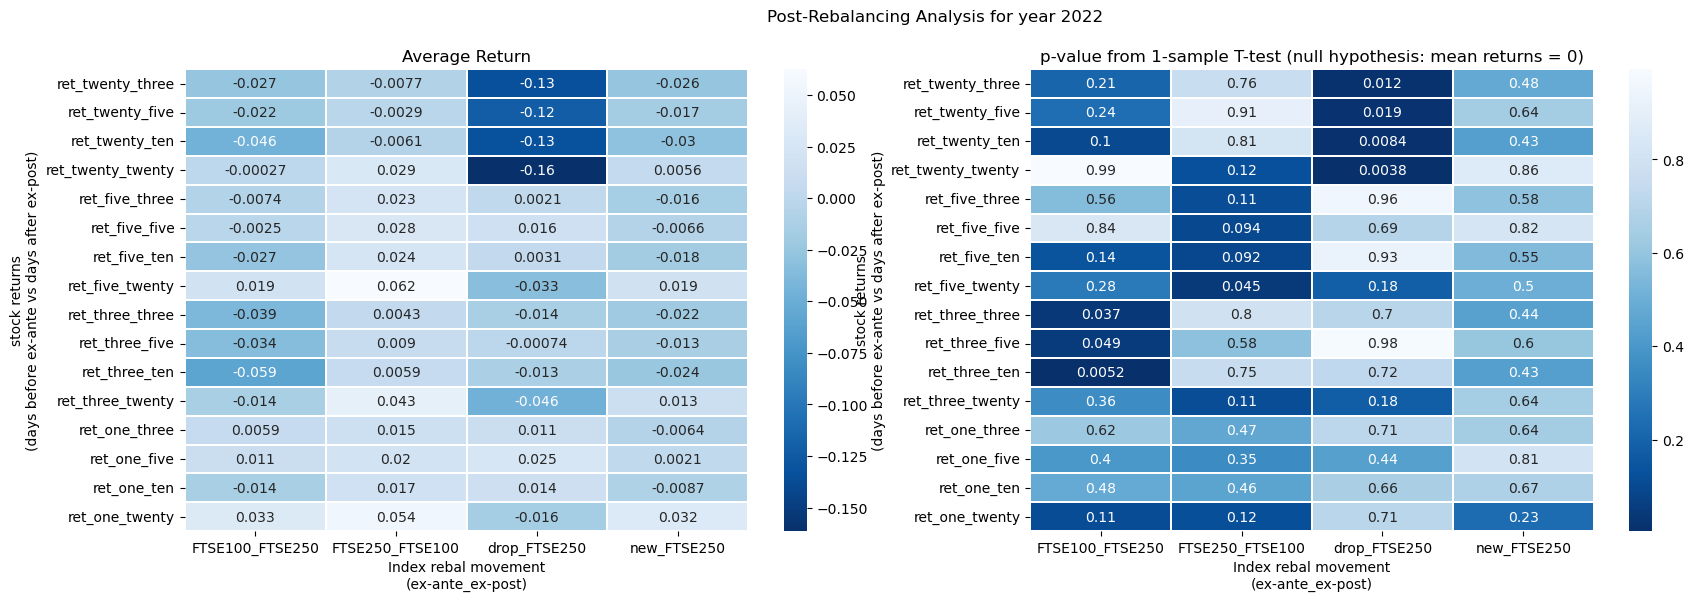

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 4                3             9            9


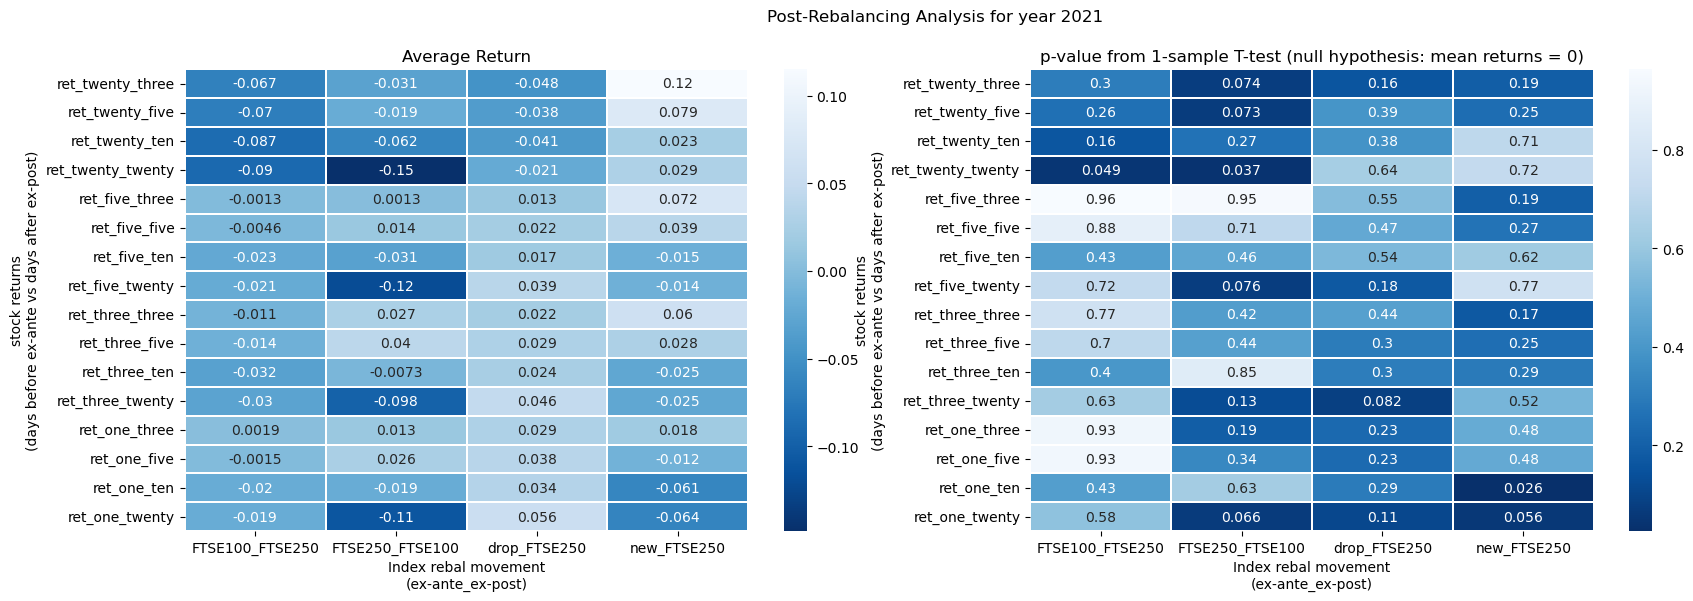

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 6                8            23           26


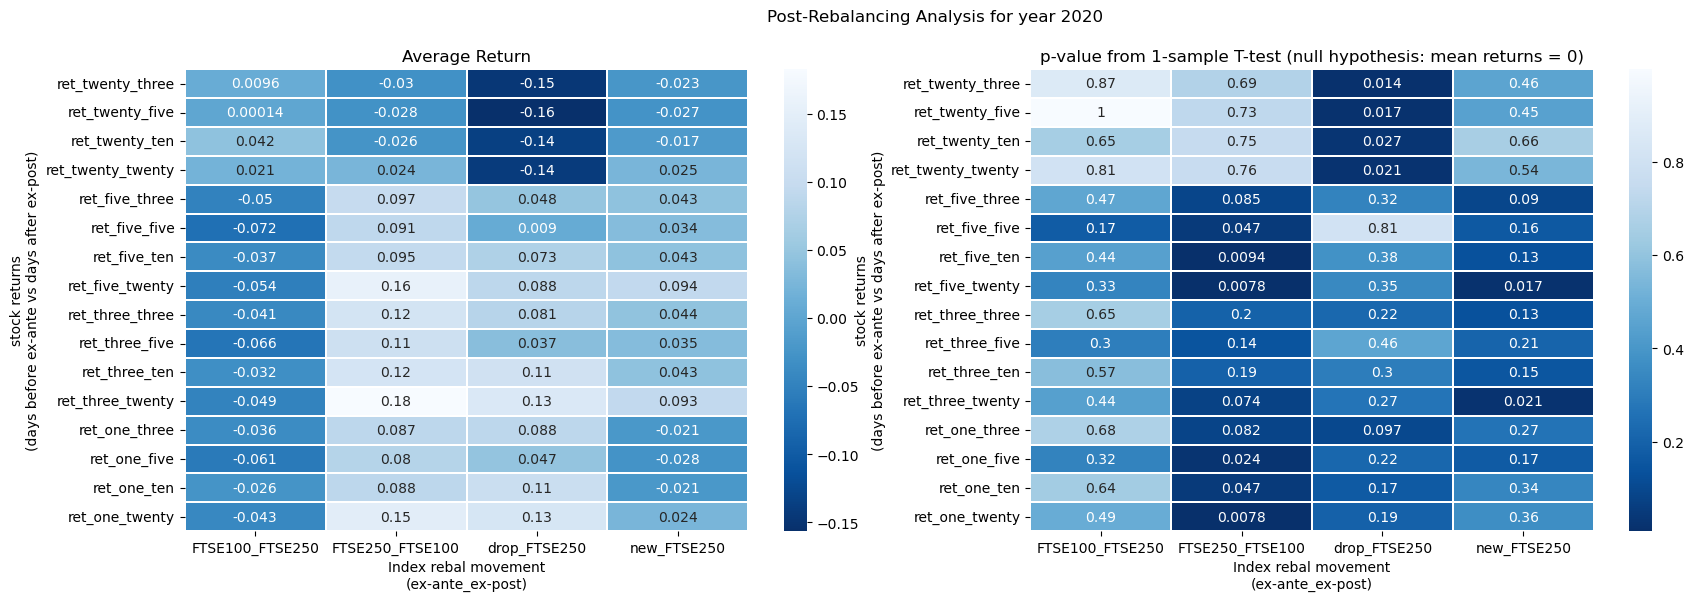

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 9                7            19           16


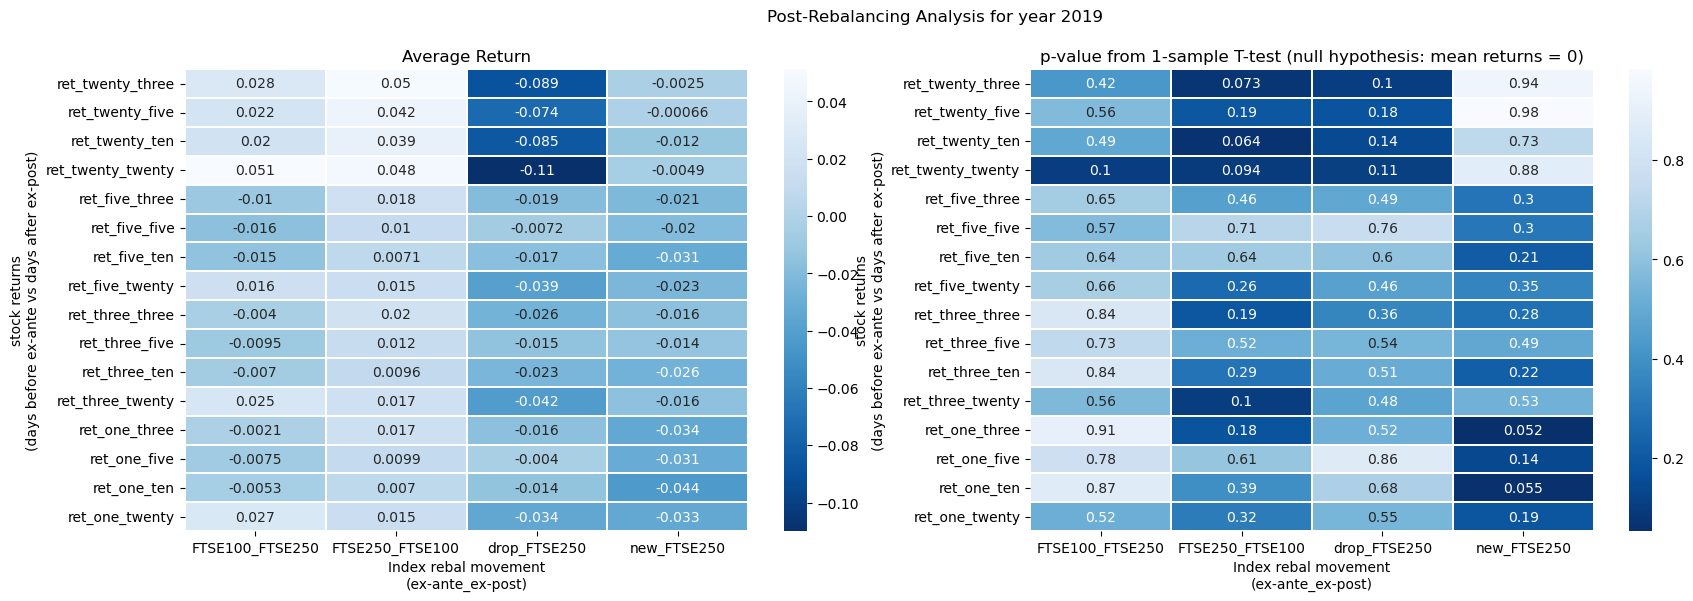

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 3                5            19           21


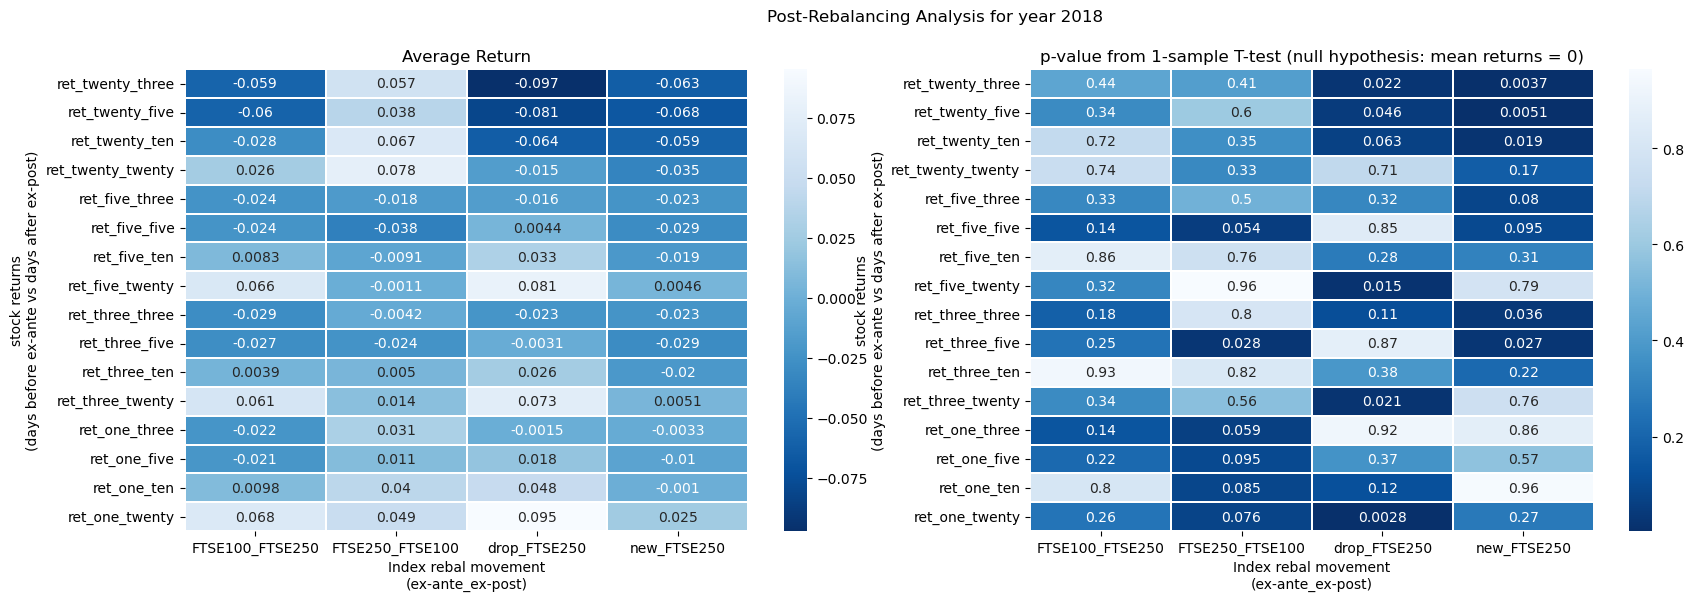

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 8                9            16           16


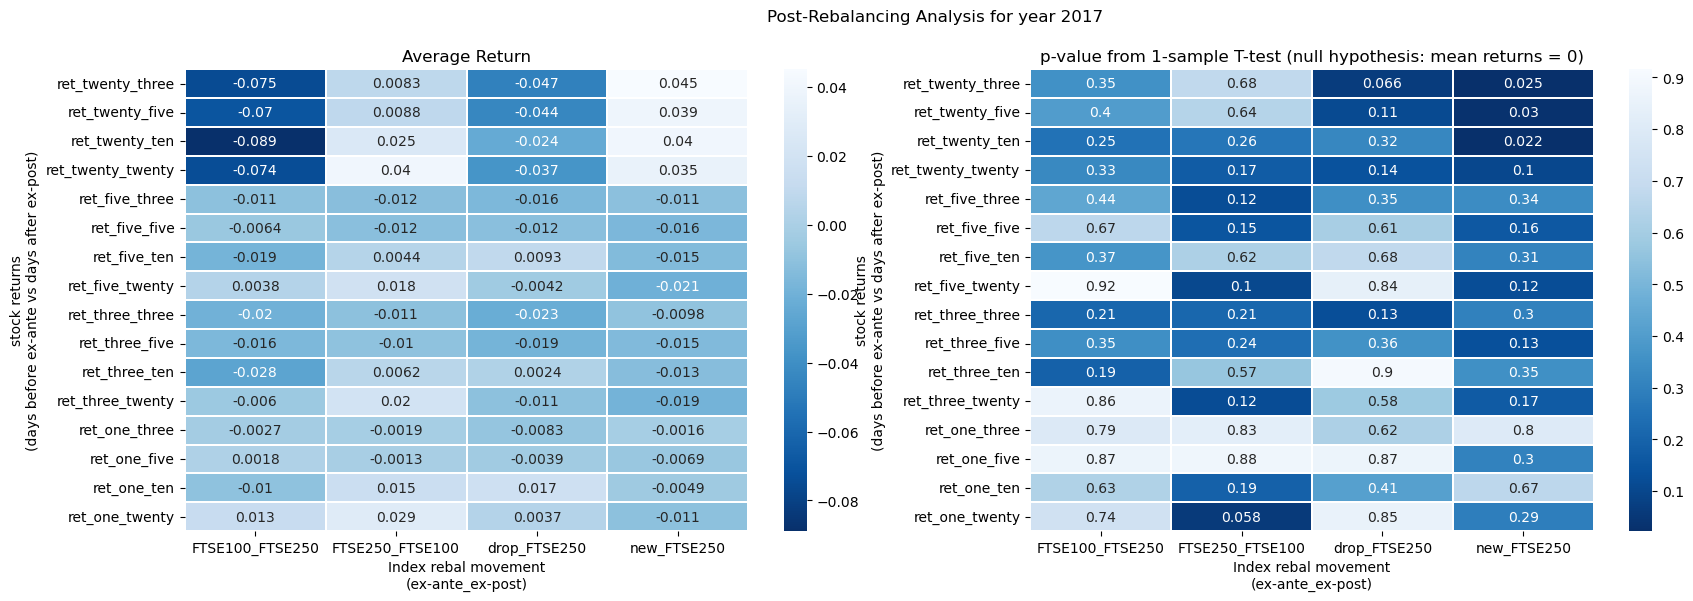

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 8                6            16           15


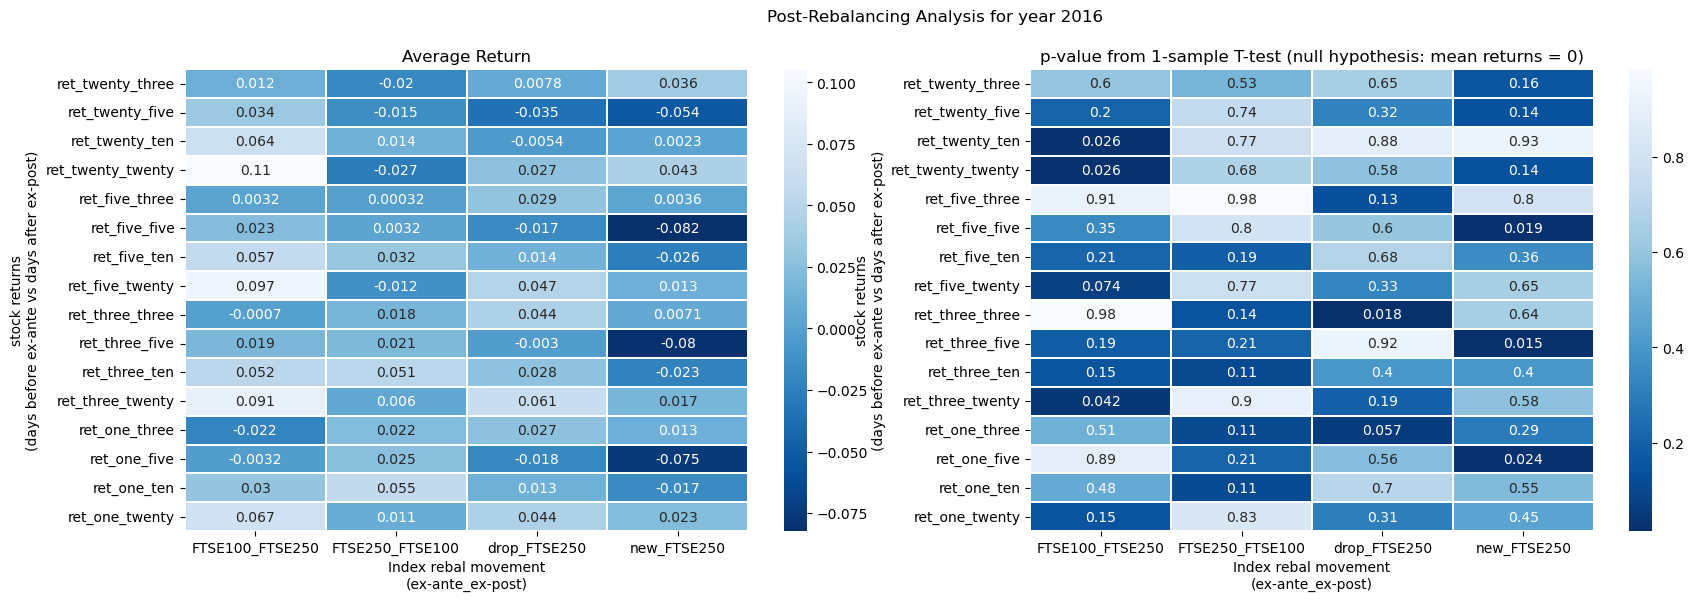

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 3                4            19           19


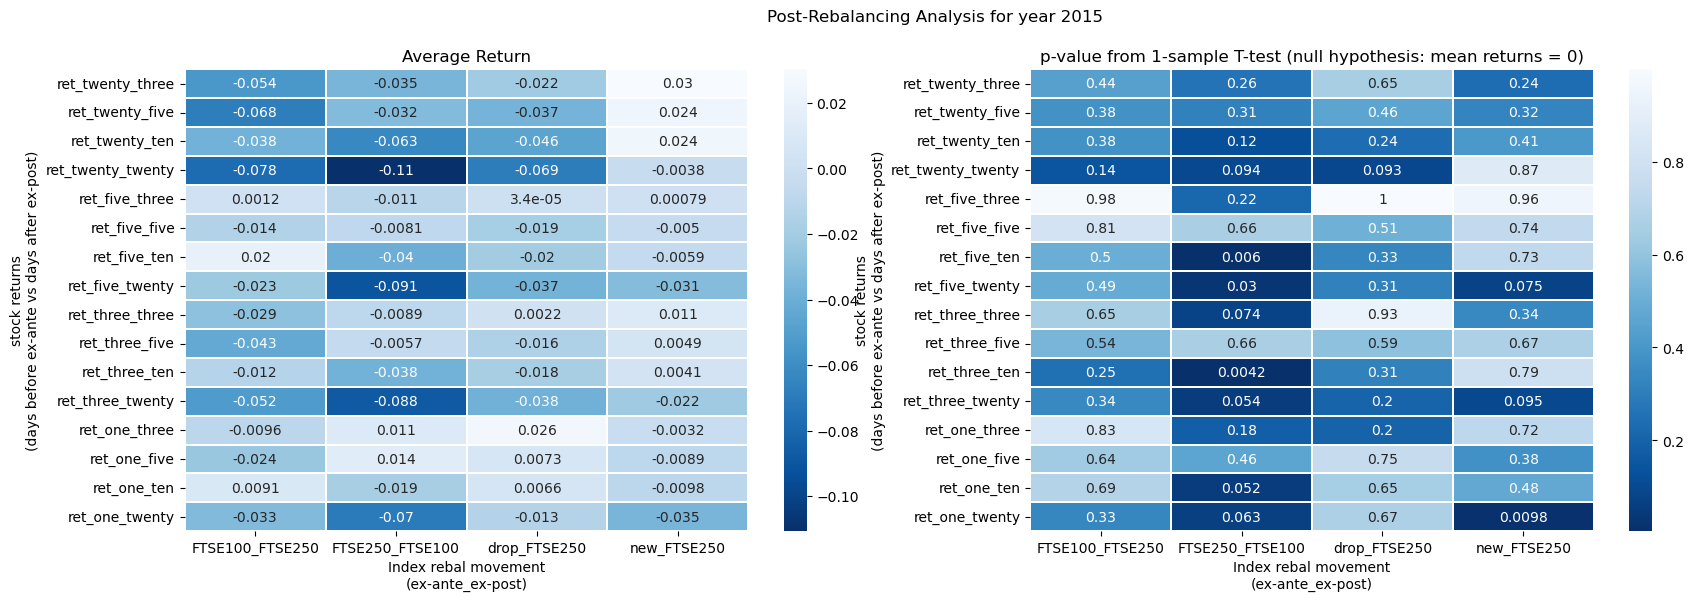

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 8                8            21           22


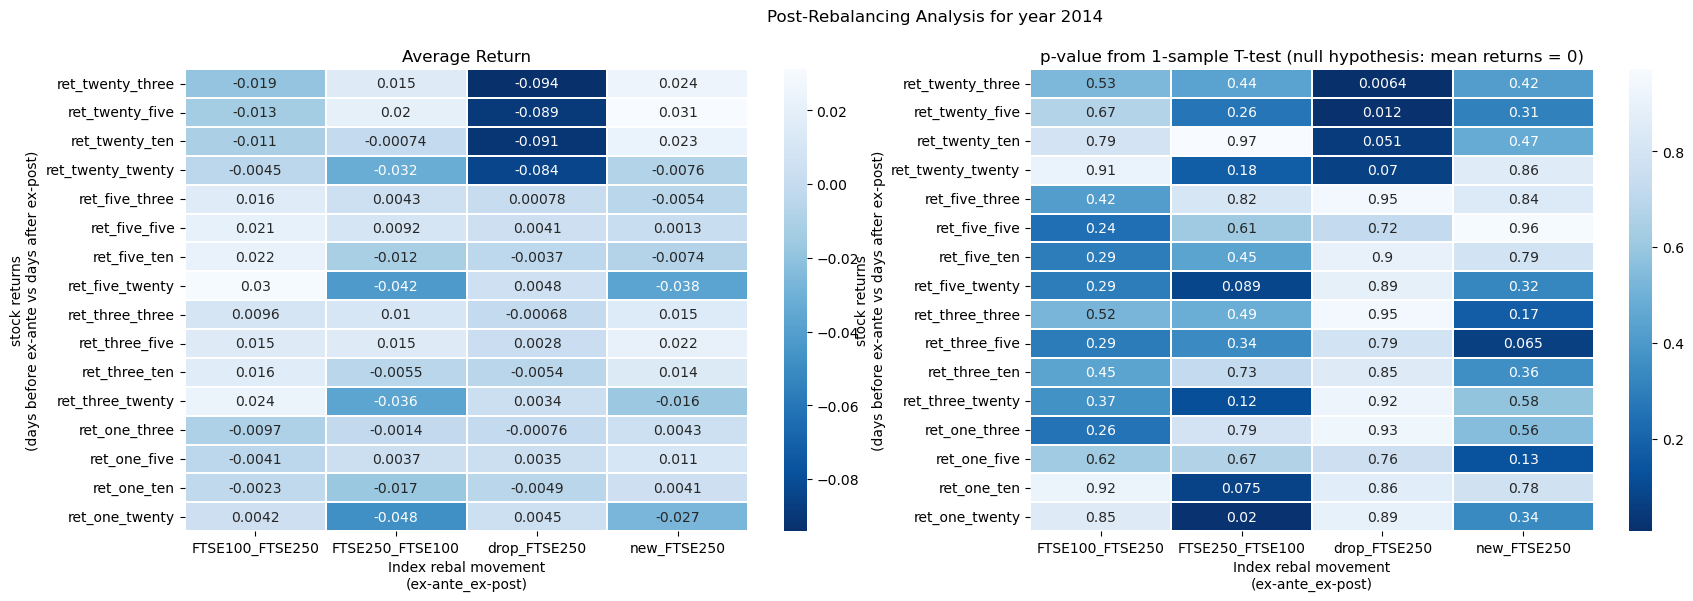

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                 7                7            19           21


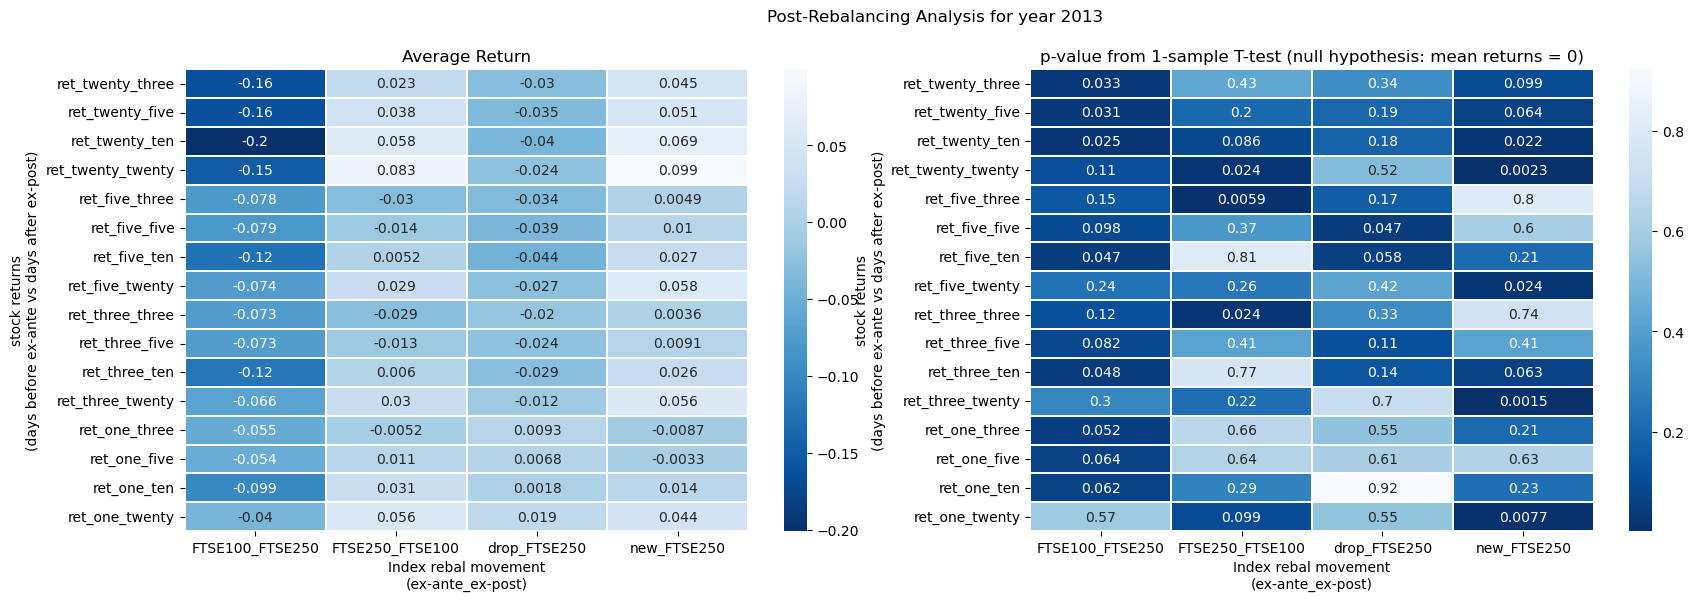

In [23]:
# Analyze by year
for year in df_rets_by_year.year.unique():
    sub_df = df_rets_by_year[df_rets_by_year['year'] == year].copy()
    print('Counts per Group')
    print(sub_df.groupby(by='Group').count()[['Name']].T)

    sub_df = sub_df.drop(['Post Date', 'year', 'quarter'], axis = 1)

    res_df = run_grannular_t_test(sub_df)
    plot_mean_pvalue_charts(res_df, title = f'Post-Rebalancing Analysis for year {year}')

## Analyzing the Index Rebalanicng Arbitrage across quarters

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                13               17            37           43


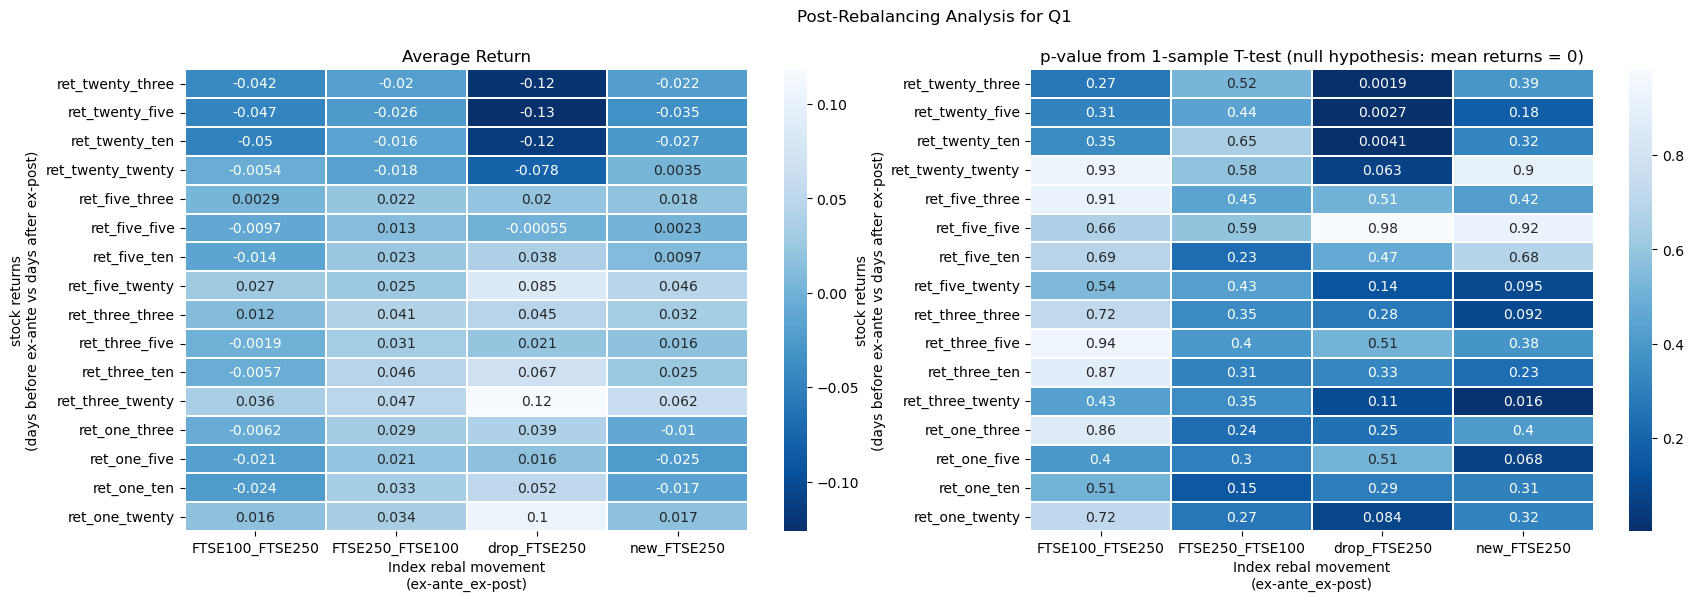

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                18               20            61           64


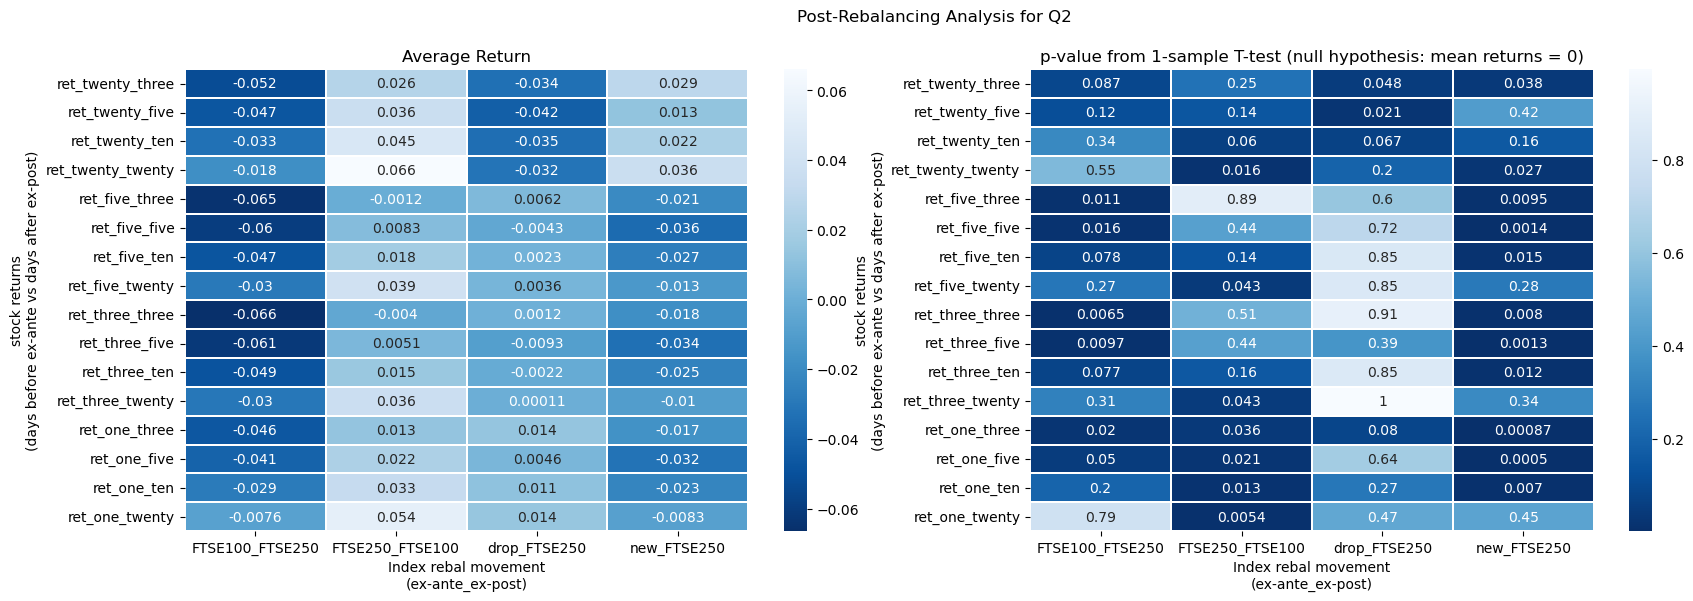

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                12               11            40           39


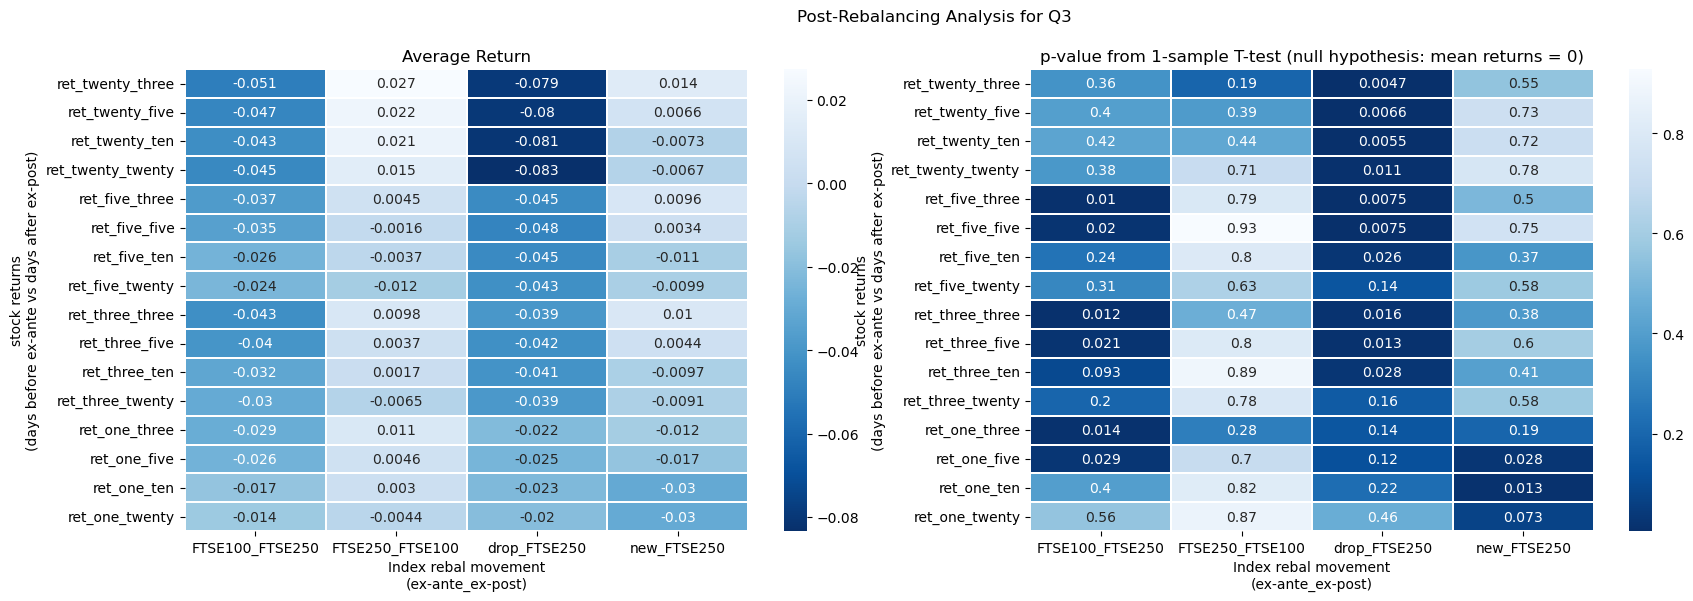

Counts per Group
Group  FTSE100_FTSE250  FTSE250_FTSE100  drop_FTSE250  new_FTSE250
Name                19               16            40           38


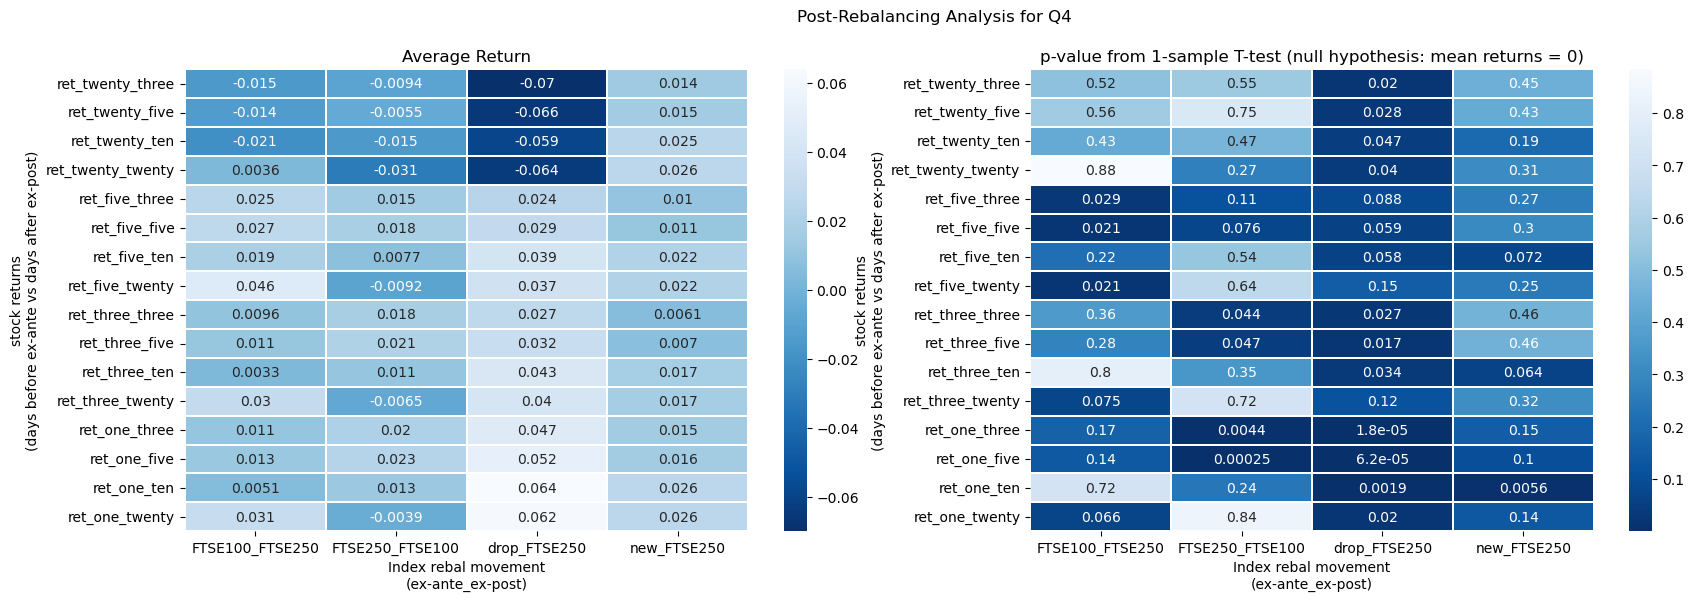

In [24]:
# Analyze by quarter
for quarter in range(1,5):
    sub_df = df_rets_by_year[df_rets_by_year['quarter'] == quarter].copy()
    print('Counts per Group')
    print(sub_df.groupby(by='Group').count()[['Name']].T)

    sub_df = sub_df.drop(['Post Date', 'year', 'quarter'], axis = 1)

    res_df = run_grannular_t_test(sub_df)
    plot_mean_pvalue_charts(res_df, title = f'Post-Rebalancing Analysis for Q{quarter}')